# **Task 3 : Car Price Prediction**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate


In [ ]:
# Load the car price dataset
car_data = pd.read_csv("car data.csv")

# **Data Exploration**

In [ ]:
print("Data Analysis:")
print(car_data.info())
print(car_data.describe())

Data Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       

In [ ]:
# Check for null values
print("\nNull Values:")
print(car_data.isnull().sum())



Null Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


# **Visualizations**

<Figure size 1200x800 with 0 Axes>

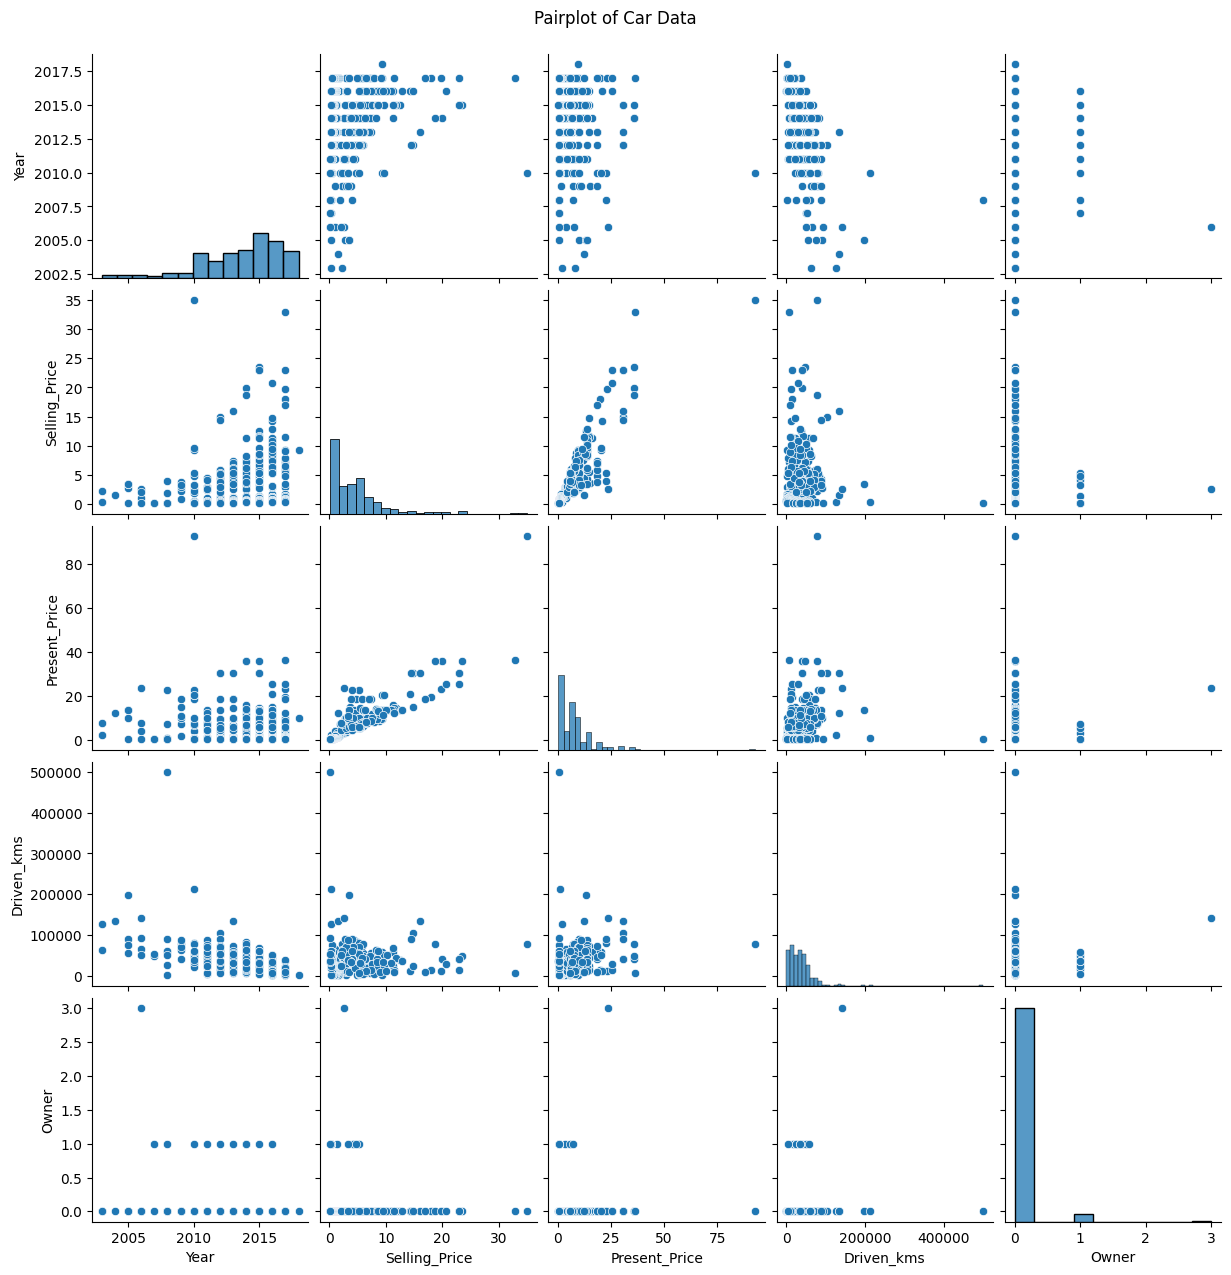

In [ ]:
# Pairplot for numerical features
plt.figure(figsize=(12, 8))
sns.pairplot(car_data)
plt.suptitle('Pairplot of Car Data', y=1.02)
plt.show()


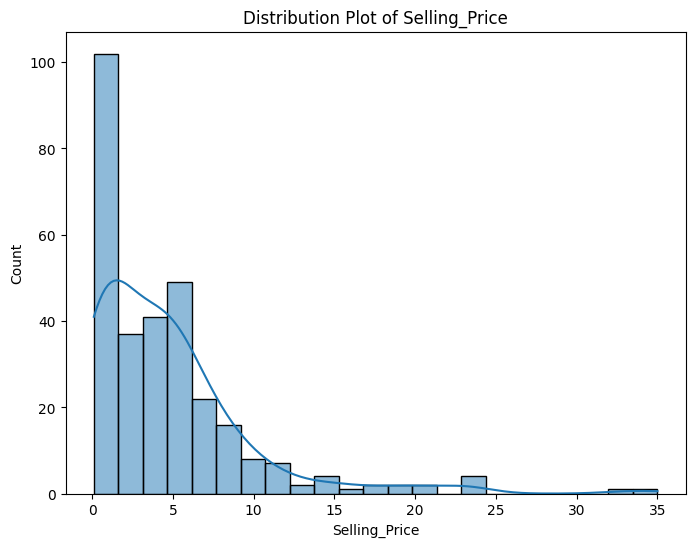

In [ ]:
# Distribution plot for the target variable (Selling_Price)
plt.figure(figsize=(8, 6))
sns.histplot(car_data['Selling_Price'], kde=True)
plt.title('Distribution Plot of Selling_Price')
plt.show()

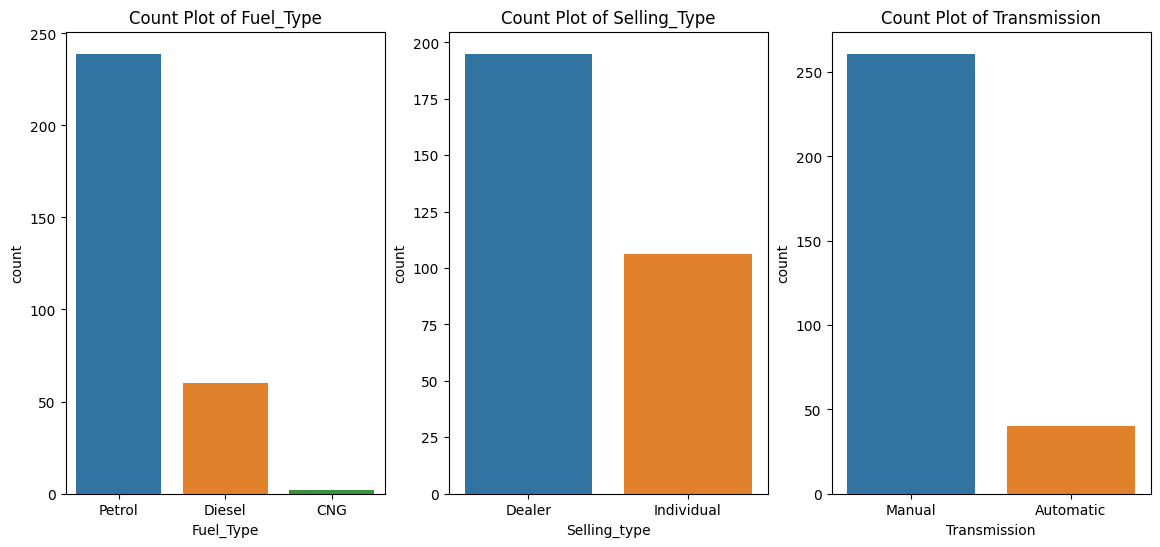

In [ ]:
# Count plot for categorical features (e.g., Fuel_Type, Selling_Type, Transmission)
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=car_data)
plt.title('Count Plot of Fuel_Type')

plt.subplot(1, 3, 2)
sns.countplot(x='Selling_type', data=car_data)
plt.title('Count Plot of Selling_Type')

plt.subplot(1, 3, 3)
sns.countplot(x='Transmission', data=car_data)
plt.title('Count Plot of Transmission')

plt.show()

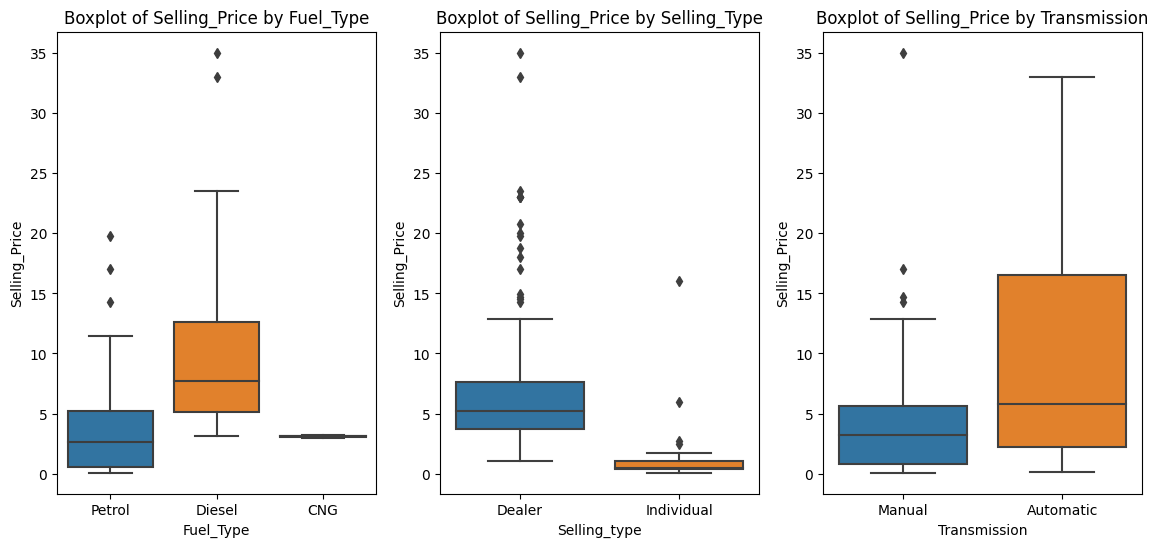

In [ ]:
# Boxplot for numerical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Boxplot of Selling_Price by Fuel_Type')

plt.subplot(1, 3, 2)
sns.boxplot(x='Selling_type', y='Selling_Price', data=car_data)
plt.title('Boxplot of Selling_Price by Selling_Type')

plt.subplot(1, 3, 3)
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data)
plt.title('Boxplot of Selling_Price by Transmission')

plt.show()

# **Data Preprocessing**

In [ ]:
# Preprocess the data
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']


In [ ]:
# Encode categorical features
one = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one.fit(X.select_dtypes(include="object"))
X_cat = pd.DataFrame(one.transform(X.select_dtypes(include="object")), columns=one.get_feature_names_out())


In [ ]:
# Combine numerical and encoded categorical features
X_encoded = pd.concat([X.select_dtypes(include="number"), X_cat], axis=1)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)


In [ ]:
# Standardize the features
sta = StandardScaler()
sta.fit(X_train)
X_train_scaled = pd.DataFrame(sta.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sta.transform(X_test), columns=X_test.columns)


<ipython-input-14-8e87c14482b6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm')


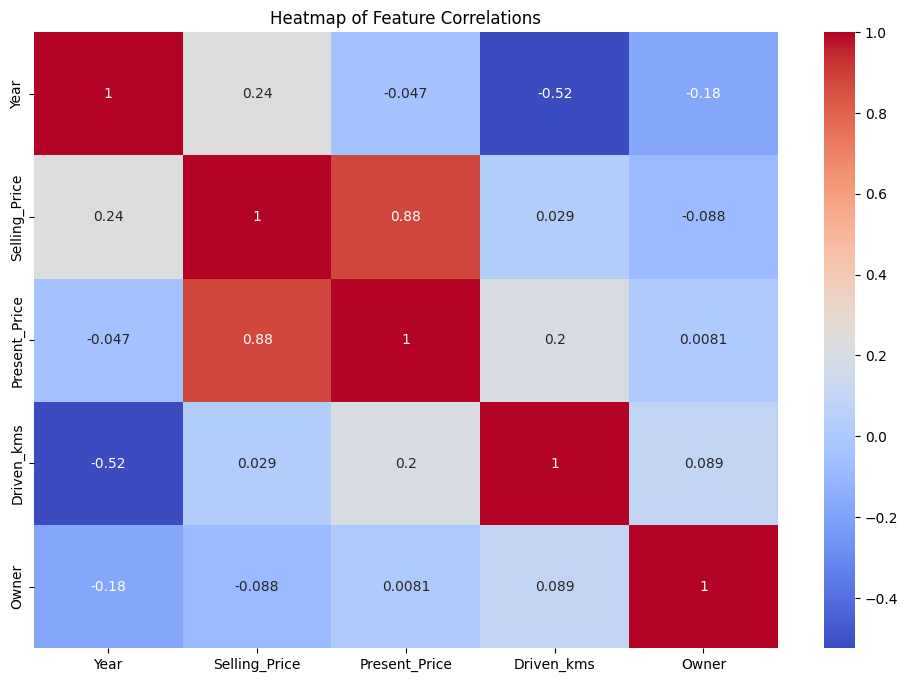

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


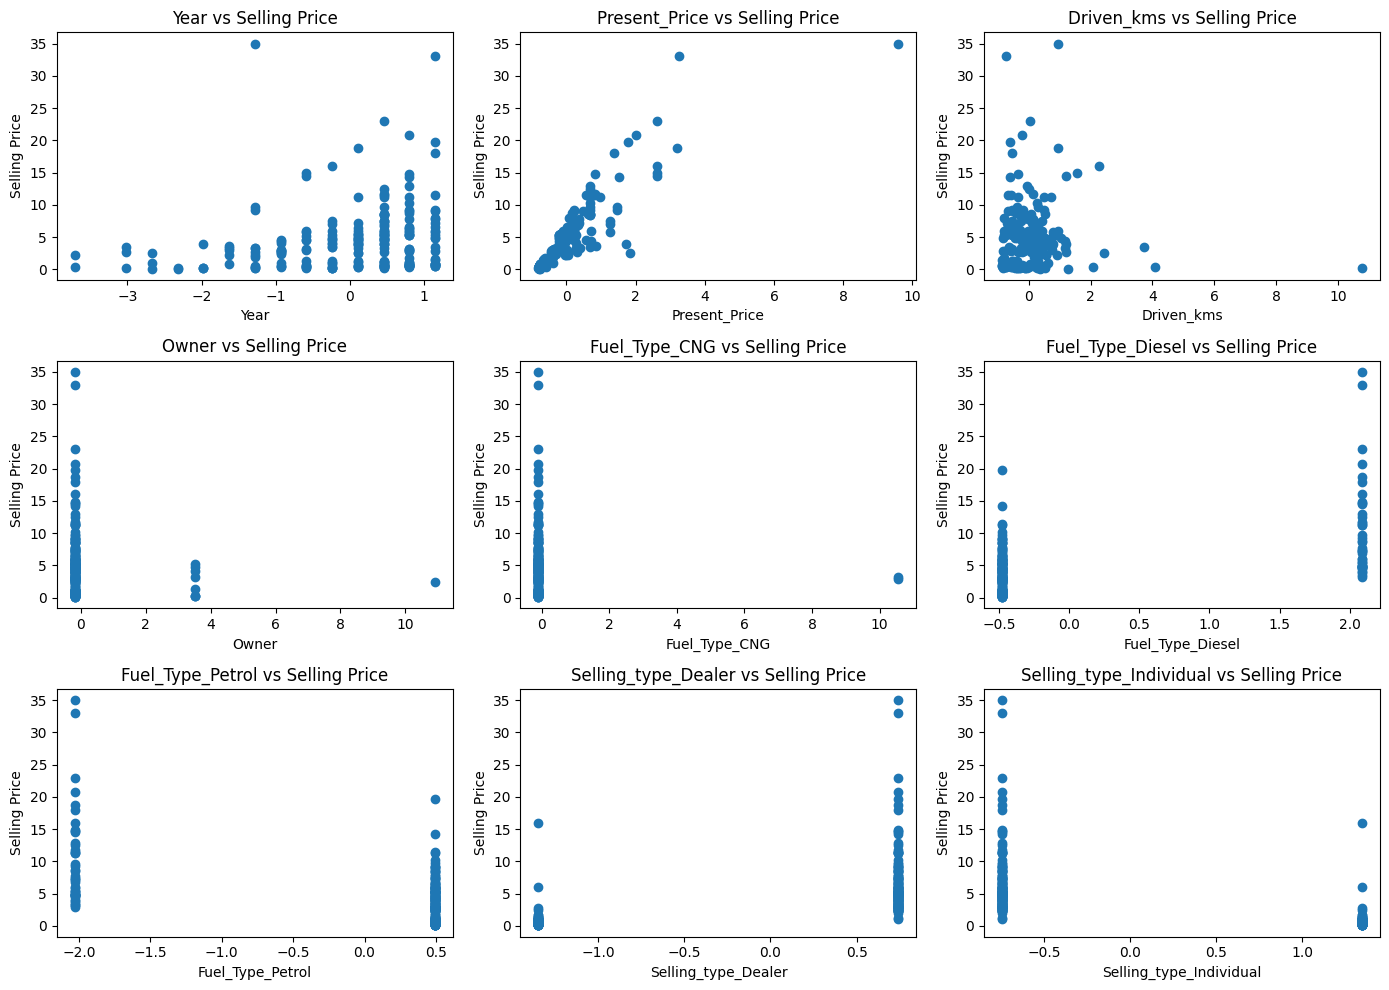

In [ ]:
# Scatter plot of Selling Price vs Numerical Features
num_features = min(9, len(X_train_scaled.columns))  # Adjust 9 based on the number of numerical features

plt.figure(figsize=(14, 10))
for i, feature in enumerate(X_train_scaled.columns[:num_features], 1):
    plt.subplot(3, 3, i)
    plt.scatter(X_train_scaled[feature], y_train)
    plt.title(f"{feature} vs Selling Price")
    plt.xlabel(feature)
    plt.ylabel("Selling Price")

plt.tight_layout()
plt.show()


# **Model Training and Evaluation**

In [ ]:

# Train and Evaluate Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
pred_linear = linear_model.predict(X_test_scaled)

In [ ]:
# Train and Evaluate Decision Tree Regressor Model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)
pred_tree = tree_model.predict(X_test_scaled)


In [ ]:
# Train and Evaluate Random Forest Regressor Model
forest_model = RandomForestRegressor()
forest_model.fit(X_train_scaled, y_train)
pred_forest = forest_model.predict(X_test_scaled)

In [ ]:
# Train and Evaluate Support Vector Regressor Model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
pred_svr = svr_model.predict(X_test_scaled)

# **Model Evaluation**

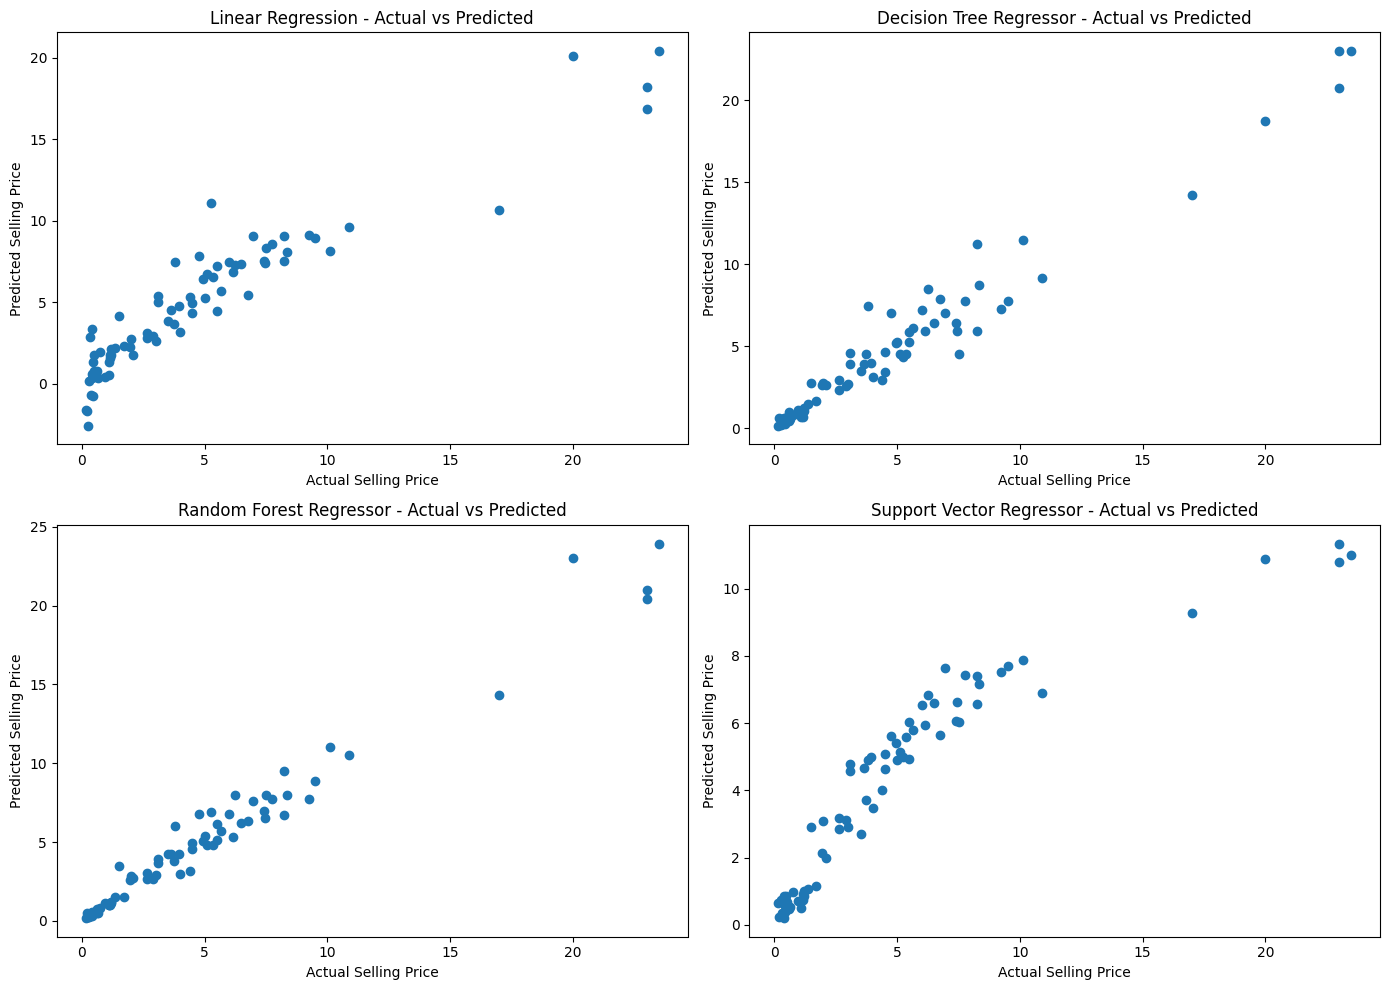

In [ ]:
# Scatter plots for Predictions vs Actual values for each model
plt.figure(figsize=(14, 10))
for i, (model_name, predictions) in enumerate(
        [("Linear Regression", pred_linear),
         ("Decision Tree Regressor", pred_tree),
         ("Random Forest Regressor", pred_forest),
         ("Support Vector Regressor", pred_svr)], 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, predictions)
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel("Actual Selling Price")
    plt.ylabel("Predicted Selling Price")

plt.tight_layout()
plt.show()


# **Model Comparison and Metrics**


Decision Tree Regressor Metrics:
Mean Squared Error: 1.2347763157894738
R2 Score: 0.9550570477156817

Random Forest Regressor Metrics:
Mean Squared Error: 0.8587006651315787
R2 Score: 0.9687453164382682

Support Vector Regressor Metrics:
Mean Squared Error: 8.431409174697132
R2 Score: 0.6931165463878366

Linear Regression Metrics:
Mean Squared Error: 3.380362045346738
R2 Score: 0.8769627760388289


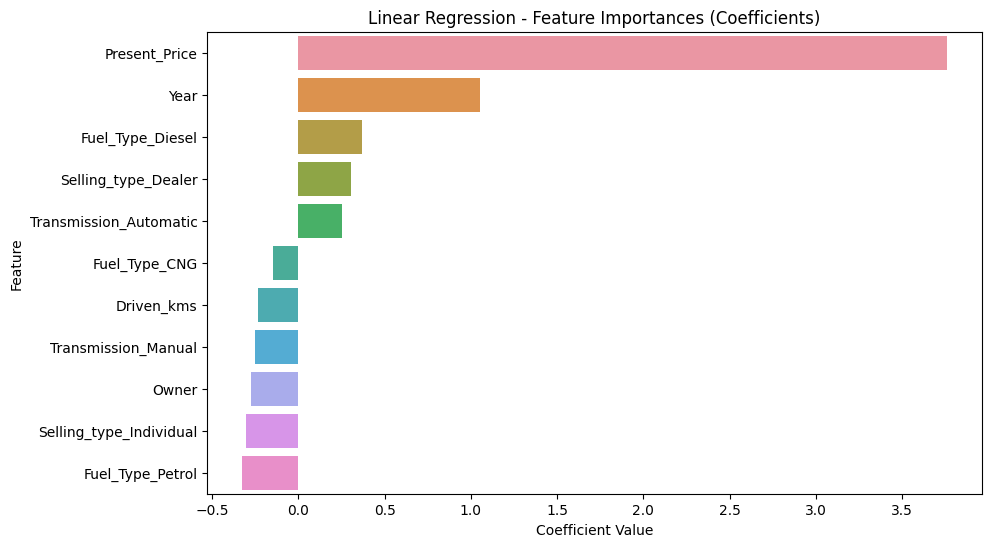

In [ ]:
# Evaluate Models
models = {
    "Decision Tree Regressor": [tree_model, pred_tree],
    "Random Forest Regressor": [forest_model, pred_forest],
    "Support Vector Regressor": [svr_model, pred_svr],
     "Linear Regression": [linear_model, pred_linear]
}

# Model Comparison and Metrics
model_results = []
for model_name, [model, predictions] in models.items():
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results.append([model_name, mse, r2])

    print(f"\n{model_name} Metrics:")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")

    # For Linear Regression, check and display coefficients
    if model_name == "Linear Regression":
        coefficients = model.coef_
        feature_names = X_encoded.columns

        # Create a DataFrame to display the coefficients
        coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
        coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

        # Bar plot for feature importances (coefficients)
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Coefficient", y="Feature", data=coef_df)
        plt.title(f"{model_name} - Feature Importances (Coefficients)")
        plt.xlabel("Coefficient Value")
        plt.ylabel("Feature")
        plt.show()


# **Model Comparison Table**

In [ ]:
print("\nModel Comparison:")
print(tabulate(model_results, headers=["Model", "Mean Squared Error", "R2 Score"], tablefmt="grid"))



Model Comparison:
+--------------------------+----------------------+------------+
| Model                    |   Mean Squared Error |   R2 Score |
+==========================+======================+============+
| Decision Tree Regressor  |             1.23478  |   0.955057 |
+--------------------------+----------------------+------------+
| Random Forest Regressor  |             0.858701 |   0.968745 |
+--------------------------+----------------------+------------+
| Support Vector Regressor |             8.43141  |   0.693117 |
+--------------------------+----------------------+------------+
| Linear Regression        |             3.38036  |   0.876963 |
+--------------------------+----------------------+------------+


In [ ]:
# Identify the model with the highest R2 score
best_models = [model_name for model_name, [model, predictions] in models.items() if r2_score(y_test, predictions) == max(model_results, key=lambda x: x[2])[2]]
print("\nThe best model(s) based on R2 Score:")
for model_name in best_models:
    print(f"{model_name} (R2 Score: {r2_score(y_test, models[model_name][1]):.4f})")



The best model(s) based on R2 Score:
Random Forest Regressor (R2 Score: 0.9687)
